In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read data

In [17]:
def find_commits(data, f0, at_final=True):
    """ 
    Returns a list with the timesteps where the fmin >= f0 and at the final timestep
    """
    commits = [data['step'].iloc[i] for i in range(len(data)) if data['fmin'].iloc[i] >= f0]
    if at_final and commits[-1] != data['step'].iloc[-1]:
        commits += [data['step'].iloc[-1]]
    return commits

In [18]:
# Change filename to the name of the file in model/results you want to plot
# filename = 'result_0_19_20_53_34_withrec.csv'
# data = pd.read_csv('../model/results/'+filename)

data_MSR = pd.read_csv('mrs_result__19_20_24_40.csv')
data_with = pd.read_csv('result_0_19_20_53_34_withrec.csv')
data_without = pd.read_csv('result_0_19_21_16_10_withoutrec.csv')
data_stats = pd.read_csv('result_0_19_21_42_44_addedstats.csv')



Plot the lowest fitness per timestep

In [19]:
def plot_fitness(data, name, f0=.5):
    commits = find_commits(data, f0)    
    for commit in commits:
        plt.axvline(commit, alpha=.01, linestyle='-.')

    plt.plot(data['fmin'])
    plt.title('Lowest fitness in repository per timestep, '+ name)
    plt.xlabel('Time')
    plt.ylabel('Fmin')
    plt.show()

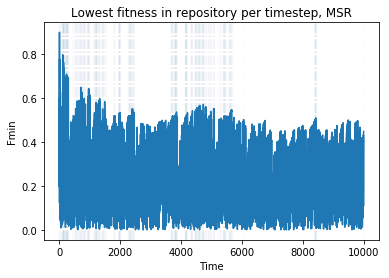

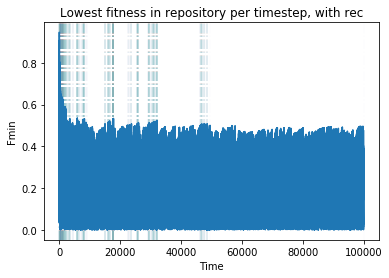

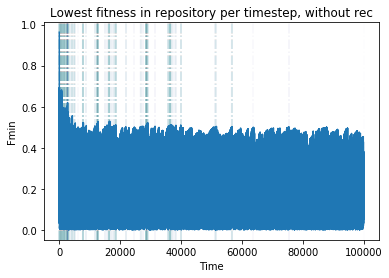

In [5]:
plot_fitness(data_MSR, 'MSR')
plot_fitness(data_with, 'with rec')
plot_fitness(data_without, 'without rec')

Plot lowest fitness at each commit timepoint

In [6]:
def plot_commits(data, name, f0=.5):
    commits = find_commits(data, f0)    
    plt.plot(range(len(commits)), data['fmin'].iloc[commits])
    plt.title('Lowest fitness in repository per commit, '+name)
    plt.xlabel('Commit')
    plt.ylabel('Fmin')
    plt.show()

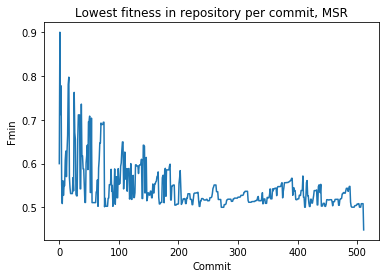

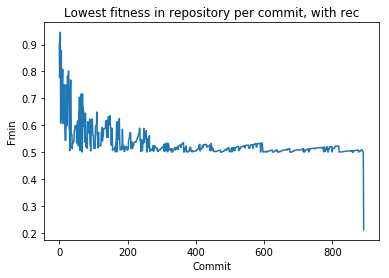

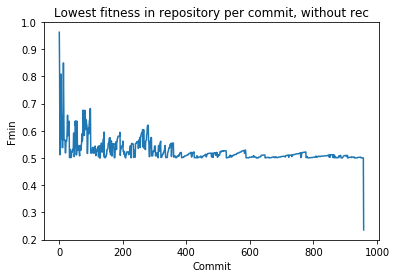

In [7]:
plot_commits(data_MSR, 'MSR')
plot_commits(data_with, 'with rec')
plot_commits(data_without, 'without rec')

Plot the lowest fitness at each commit, using timestep xscale

In [10]:
def plot_commitstep(data, name, f0=.5):
    commits = find_commits(data, f0)    
    plt.scatter(commits, data['fmin'].iloc[commits], s=1)
    plt.title('Lowest fitness in a commit per step, '+name)
    plt.xlabel('Commit')
    plt.ylabel('Fmin')
    plt.show()

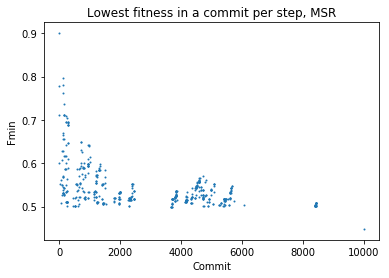

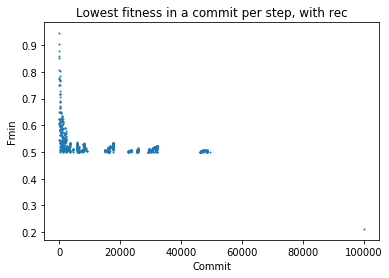

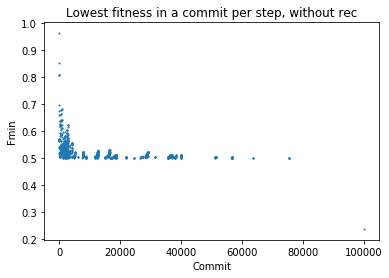

In [11]:
plot_commitstep(data_MSR, 'MSR')
plot_commitstep(data_with, 'with rec')
plot_commitstep(data_without, 'without rec')

Info on the last action before a commit

In [14]:
print('used proportions:\n', 
    'update_method, 0.45\n',
    'call_method, 0.4\n',
    'delete_method, 0.05\n',
         'create_method, 0.1\n',
    'create_class, 0.1\n')

def action_info(data, name, f0=.5):
    print(name)
    commits = find_commits(data, f0)        
    print(data['action'].iloc[commits].value_counts()/len(commits))
    print()


# action_info(data_MSR, 'MSR')
action_info(data_with, 'with rec')
action_info(data_without, 'without rec')

used proportions:
 update_method, 0.45
 call_method, 0.4
 delete_method, 0.05
 create_method, 0.1
 create_class, 0.1

with rec
update_method    0.669653
call_method      0.202688
remove_method    0.076148
create_method    0.051512
Name: action, dtype: float64

without rec
update_method    0.671533
call_method      0.213764
remove_method    0.070907
create_method    0.043796
Name: action, dtype: float64



## Stats on fitness

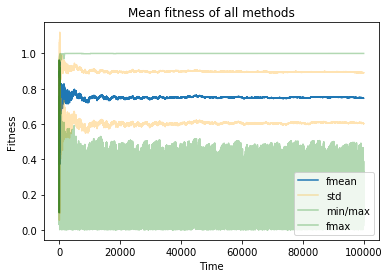

In [15]:
plt.plot(data_stats['fmean'], label='fmean')
plt.plot(data_stats['fmean']+data_stats['fstd'], c='orange', alpha=.3, label='std')
plt.plot(data_stats['fmean']-data_stats['fstd'], c='orange', alpha=.3)
plt.plot(data_stats['fmin'], c='green', alpha=.3, label='min/max')
plt.plot(data_stats['fmax'], c='green', alpha=.3)

plt.title('Mean fitness of all methods')
plt.xlabel('Time')
plt.ylabel('Fitness')
plt.legend()

Text(0.5, 1.0, 'Number of methods over time')

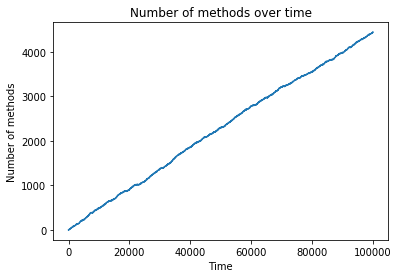

In [16]:
plt.plot(data_stats['fnum'])
plt.ylabel('Number of methods')
plt.xlabel('Time')
plt.title('Number of methods over time')